In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.ticker as ticker

from matplotlib.gridspec import GridSpec
from dateutil.parser import parse

In [2]:
datos = pd.read_csv('../data/test.csv',index_col=0,parse_dates=True)
sensores= datos.columns

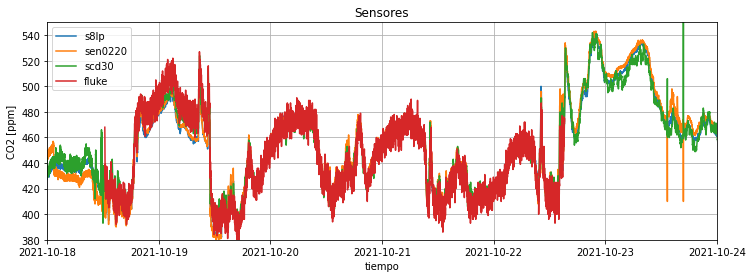

In [55]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse("2021-10-18 00:00") 
fecha2 = fecha1 + pd.Timedelta("6D")
ax.set_xlim(fecha1,fecha2)
for sensor in sensores:
    ax.plot(datos[sensor],label=sensor)

ax.legend()
ax.set_ylim(380,550)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

In [4]:
for dia in range(18,24):
    day = '2021-10-'+ str(dia)
    print(day)

2021-10-18
2021-10-19
2021-10-20
2021-10-21
2021-10-22
2021-10-23


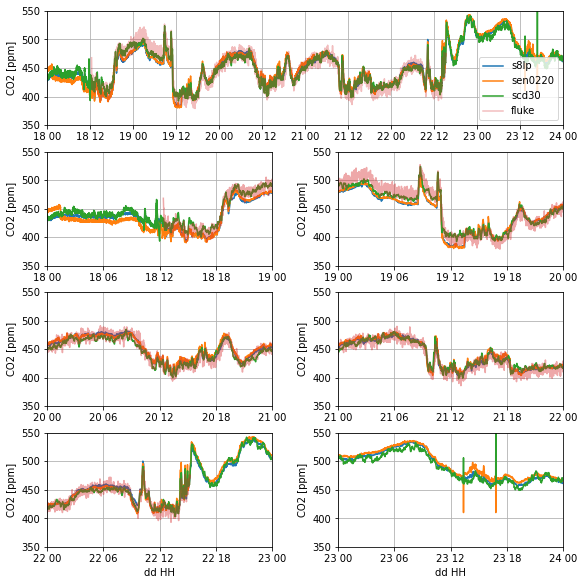

In [64]:
def setup(ax,dia1,dias,horas):
    hours = mdates.HourLocator(interval = horas)
    h_fmt = mdates.DateFormatter('%d %H')
    fecha1 = parse(dia1) 
    fecha2 = fecha1 + pd.Timedelta(dias)
    ax.set_xlim(fecha1,fecha2)
    ax.xaxis.set_major_locator(hours)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
    ax.xaxis.set_major_formatter(h_fmt)
    ax.set_ylim(350,550)
    ax.set_ylabel('CO2 [ppm]')
    ax.grid()
    
def grafica(sensores,datos,ax,alpha=1,legend=False):
    for sensor in sensores:
        if sensor != 'fluke':
            ax.plot(datos[sensor],label=sensor)
        else: 
            ax.plot(datos[sensor],label=sensor,alpha=alpha)
    
    if legend:
        ax.legend()
    
fig = plt.figure(constrained_layout=True,figsize=(8,8))

gs = GridSpec(4, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[1, 2:])
ax4 = fig.add_subplot(gs[2, 0:2])
ax5 = fig.add_subplot(gs[2, 2:])
ax6 = fig.add_subplot(gs[3, 0:2])
ax7 = fig.add_subplot(gs[3, 2:])    

setup(ax1,"2021-10-18 00:00",'6D',12)
grafica(sensores,datos,ax1,alpha=0.3,legend=True)
    
setup(ax2,"2021-10-18",'1D',6)
grafica(sensores,datos,ax2,alpha=0.4)
    
setup(ax3,"2021-10-19",'1D',6)
grafica(sensores,datos,ax3,alpha=0.4)
    
setup(ax4,"2021-10-20",'1D',6)
grafica(sensores,datos,ax4,alpha=0.4) 
    
setup(ax5,"2021-10-21",'1D',6)
grafica(sensores,datos,ax5,alpha=0.4) 
   
setup(ax6,"2021-10-22",'1D',6)
grafica(sensores,datos,ax6,alpha=0.4) 
ax6.set_xlabel('dd HH')

setup(ax7,"2021-10-23",'1D',6)
grafica(sensores,datos,ax7,alpha=0.4) 
ax7.set_xlabel('dd HH')

# plt.savefig('figura.pdf',dpi=200)

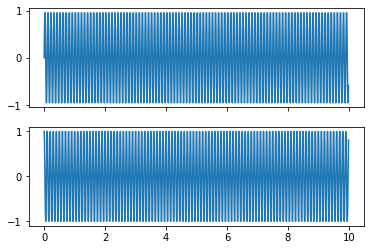

In [23]:
import numpy as np
t= np.arange(1000)/100.
x = np.sin(2*np.pi*10*t)
y = np.cos(2*np.pi*10*t)

fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(t,x)
ax2.plot(t,y)

# ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
# ax2.autoscale() ## call autoscale if needed

plt.show()